In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd

# Modelo de regresión

Construir un modelo de regresión para el siguiente modelo lineal

$ y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + w_4 * x_4 + b$

In [3]:
# Definimos los parámetros de nuestro modelo
weights = np.asarray([5, -1, 0, -2, 1])
bias = 2

In [4]:
X = np.random.randn(100, 5) # Generamos features sintéticas
y = np.matmul(X, weights) +  bias # Calculamos los targets # * Esto es generar el modelo de regresión random. 

Creamos una red para el modelo.

In [5]:
input_ = keras.layers.Input(5) # * Tenemos 5 inputs - 4 parametros + el bías. 
x = keras.layers.Dense(1)(input_) # * Lo conectamos a una única neurona

model = keras.models.Model(input_, x)

In [6]:
model.compile("adam", "mse") # * En vez de gradient descent, basamos nuestra función de coste con ADAM y en base a Mean Square Error. 

In [7]:
model.fit(X, y, batch_size=1, epochs=200, verbose=2) # * Lo hacemos one-to-one, no hacemos stochastic gradient descent. Y aplicamos 200 epochs. 

Epoch 1/200


100/100 - 0s - loss: 35.5595 - 147ms/epoch - 1ms/step
Epoch 2/200
100/100 - 0s - loss: 34.8207 - 40ms/epoch - 401us/step
Epoch 3/200
100/100 - 0s - loss: 34.1028 - 40ms/epoch - 404us/step
Epoch 4/200
100/100 - 0s - loss: 33.3929 - 42ms/epoch - 424us/step
Epoch 5/200
100/100 - 0s - loss: 32.6835 - 39ms/epoch - 390us/step
Epoch 6/200
100/100 - 0s - loss: 31.9734 - 36ms/epoch - 359us/step
Epoch 7/200
100/100 - 0s - loss: 31.2882 - 35ms/epoch - 352us/step
Epoch 8/200
100/100 - 0s - loss: 30.6064 - 34ms/epoch - 336us/step
Epoch 9/200
100/100 - 0s - loss: 29.9484 - 34ms/epoch - 337us/step
Epoch 10/200
100/100 - 0s - loss: 29.2830 - 32ms/epoch - 322us/step
Epoch 11/200
100/100 - 0s - loss: 28.6482 - 32ms/epoch - 323us/step
Epoch 12/200
100/100 - 0s - loss: 28.0177 - 33ms/epoch - 327us/step
Epoch 13/200
100/100 - 0s - loss: 27.4059 - 33ms/epoch - 333us/step
Epoch 14/200
100/100 - 0s - loss: 26.7828 - 37ms/epoch - 374us/step
Epoch 15/200
100/100 - 0s - loss: 26.1769 - 40ms/epoch - 402us/step
Ep

Podemos ver los pesos que ha entrenado la red.

In [8]:
model.layers[1].weights

for weight in model.layers[1].get_weights():
    weight_array_integer = np.rint(weight).astype(int)  # Round to nearest int and convert
    print(weight_array_integer)

# * Which if we compare to the model, is exactly it! Yeyyyy

[[ 5]
 [-1]
 [ 0]
 [-2]
 [ 1]]
[2]


Comparamos los resultados con los pesos originales en el modelo:

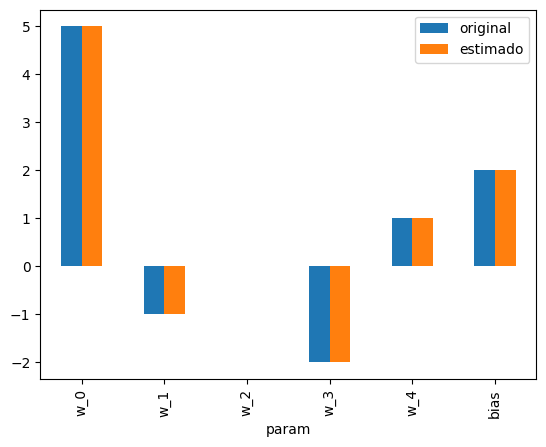

In [9]:
pd_results = pd.DataFrame([(f"w_{i}", weights[i], model.layers[1].weights[0].numpy()[i][0]) for i in range(len(weights))] + [("bias", bias, model.layers[1].weights[1].numpy()[0])],
                         columns=["param", "original", "estimado"])
pd_results.set_index("param").plot.bar();

# Modelo de clasificación binaria

Ahora construimos un modelo de clasificación basado en dos variables.

In [10]:
# Parámetros del modelo
weights = np.asarray([0.3, -0.2])
bias = 0.1

In [11]:
X = np.random.randn(500, 2) # Generamos features sintéticas # * y = 0.3 x_1 - 0.2 x_2
y = ((np.matmul(X, weights) +  bias) > 0).astype("int") # Generamos los targets

Ecuacion de la recta que separa las clases: y = 1.4999999999999998 * x + -0.5


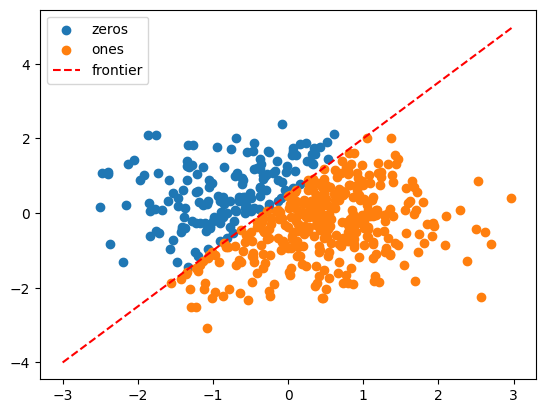

In [12]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="zeros")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="ones")

# * plot line
xs = np.linspace(-3, 3, 100)
m = - weights[0] / weights[1]
n = bias / weights[1]
print(f"Ecuacion de la recta que separa las clases: y = {m} * x + {n}")
ys =  m * xs - n


plt.plot(xs, ys, "r--", label="frontier")
plt.legend();

In [13]:
input_ = keras.layers.Input(2)
x = keras.layers.Dense(1, activation="sigmoid")(input_) # La variable de salida es binaria, asi que ponemos una sigmoide como función de activación

model = keras.models.Model(input_, x)

In [14]:
model.compile("adam", "binary_crossentropy") # Ahora la loss funtion debe ser la binary crossentropy

In [15]:
model.fit(X, y, batch_size=1, epochs=200, verbose=2)

Epoch 1/200


500/500 - 0s - loss: 0.4211 - 270ms/epoch - 539us/step
Epoch 2/200
500/500 - 0s - loss: 0.3618 - 163ms/epoch - 327us/step
Epoch 3/200
500/500 - 0s - loss: 0.3204 - 164ms/epoch - 328us/step
Epoch 4/200
500/500 - 0s - loss: 0.2898 - 165ms/epoch - 329us/step
Epoch 5/200
500/500 - 0s - loss: 0.2663 - 166ms/epoch - 332us/step
Epoch 6/200
500/500 - 0s - loss: 0.2475 - 163ms/epoch - 327us/step
Epoch 7/200
500/500 - 0s - loss: 0.2321 - 164ms/epoch - 328us/step
Epoch 8/200
500/500 - 0s - loss: 0.2190 - 164ms/epoch - 329us/step
Epoch 9/200
500/500 - 0s - loss: 0.2079 - 164ms/epoch - 328us/step
Epoch 10/200
500/500 - 0s - loss: 0.1982 - 163ms/epoch - 326us/step
Epoch 11/200
500/500 - 0s - loss: 0.1897 - 163ms/epoch - 326us/step
Epoch 12/200
500/500 - 0s - loss: 0.1821 - 170ms/epoch - 340us/step
Epoch 13/200
500/500 - 0s - loss: 0.1755 - 174ms/epoch - 348us/step
Epoch 14/200
500/500 - 0s - loss: 0.1695 - 175ms/epoch - 349us/step
Epoch 15/200
500/500 - 0s - loss: 0.1641 - 171ms/epoch - 342us/step
E

In [16]:
predictions = np.round(model.predict(X).flatten())

16/16 [==============================] - 0s 462us/step


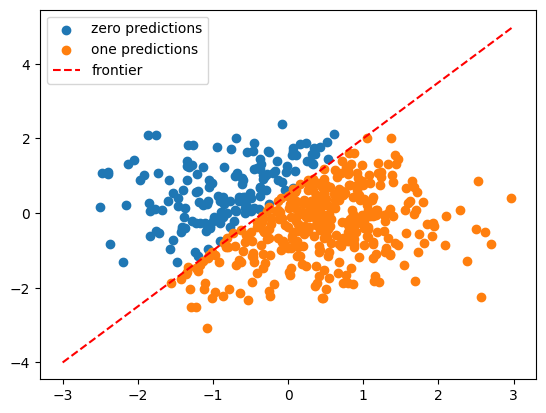

In [17]:
zeros_predictions = [i for i in range(len(predictions)) if predictions[i] == 0]
ones_predictions = [i for i in range(len(predictions)) if predictions[i] == 1]

plt.scatter(X[zeros_predictions, 0], X[zeros_predictions, 1], label="zero predictions")
plt.scatter(X[ones_predictions, 0], X[ones_predictions, 1], label="one predictions")
plt.plot(xs, ys, "r--", label="frontier")
plt.legend();

Comprobamos que el algoritmo ha convergido a la separación lineal óptima.

# Modelo paramétrico complejo

En los modelos que hemos implementado hasta ahora se ha asumido una relación lineal entre entradas y salidas. Hubiesemos conseguido el mismo resultado entrenando una regresión lineal o una regresión logística sobre los datasets.

Podemos utilizar keras para encontrar los parámetros de modelos mucho más complejos. Por ejemplo, supongamos que sabemos que la relación entre la salida y las entradas de nuestro modelo viene dada por los siguientes parámetros:

$y = tanh(w_0 * x_0) * exp(w_1 * x_1 + w_2)$

Para determinados valores de $w_0$, $w_1$ y $w_2$. 

In [39]:
# Parámetros del modelo
weights = np.asarray([0.4, 0.3, -0.2]) # * Two input parameters and the bias

In [40]:
 # ? - 1000 rows of 2 columns. 
X = np.random.randn(1_000, 2) # Generamos features sintéticas
# ? - Formulate the defined equation. 
y = np.tanh(weights[0] * X[:, 0]) * np.exp(weights[1] * X[:, 1] + weights[2])

Implementamos un modelo en keras que siga la ecuación dada.

In [41]:
input_x0 = keras.layers.Input(shape=(1,), name="x0")
input_x1 = keras.layers.Input(shape=(1,), name="x1")

x_0 = keras.layers.Dense(1, use_bias=0, name="w0")(input_x0) # * Here use_bias = 0, deletes the use of the bias variable from the actual adjustment
x_0 = tf.math.tanh(x_0) # * Since we have 2 types of functions, we need 2 separate neural networks. 

x_1 = keras.layers.Dense(1, name="w1_w2")(input_x1)
x_1 = tf.exp(x_1)

ouput = x_0 * x_1

Actually, by default, we're using the **Functional API** from Keras here. However it's not obvious because they haven't declared it. 
We see that we have two different types of inputs, as well as the custom layer operations. 

In [43]:
model = keras.models.Model([input_x0, input_x1], ouput) # * Here the thing is that we don't declare it as functional, or sequential. Why?

In [44]:
model.compile("adam", "mse")

In [35]:
model.fit({"x0": X[:, 0], "x1": X[:, 1]}, y, batch_size=1, epochs=30, verbose=2, validation_split=0.2)
# * Model being fit by taking in the input parameters and wishing to output the others. 

Epoch 1/30


800/800 - 1s - loss: 7.7907e-05 - val_loss: 1.5075e-05 - 518ms/epoch - 647us/step
Epoch 2/30
800/800 - 0s - loss: 3.1040e-05 - val_loss: 5.2112e-06 - 376ms/epoch - 469us/step
Epoch 3/30
800/800 - 0s - loss: 1.0642e-05 - val_loss: 2.1448e-06 - 342ms/epoch - 428us/step
Epoch 4/30
800/800 - 0s - loss: 2.6536e-06 - val_loss: 2.8542e-07 - 337ms/epoch - 421us/step
Epoch 5/30
800/800 - 0s - loss: 4.8141e-07 - val_loss: 2.8868e-07 - 341ms/epoch - 426us/step
Epoch 6/30
800/800 - 0s - loss: 7.6003e-08 - val_loss: 3.4881e-08 - 339ms/epoch - 424us/step
Epoch 7/30
800/800 - 0s - loss: 8.9981e-09 - val_loss: 5.8687e-08 - 340ms/epoch - 425us/step
Epoch 8/30
800/800 - 0s - loss: 2.1898e-07 - val_loss: 3.3563e-07 - 336ms/epoch - 420us/step
Epoch 9/30
800/800 - 0s - loss: 6.1821e-08 - val_loss: 1.7652e-07 - 337ms/epoch - 422us/step
Epoch 10/30
800/800 - 0s - loss: 9.9308e-07 - val_loss: 4.5071e-09 - 362ms/epoch - 453us/step
Epoch 11/30
800/800 - 0s - loss: 2.2884e-06 - val_loss: 1.5422e-10 - 338ms/epoch

In [36]:
w_0_estimated = model.get_layer("w0").weights[0].numpy().flatten()[0]
w_1_estimated = model.get_layer("w1_w2").weights[0].numpy().flatten()[0] # * We get the single parameter here
w_2_estimated = model.get_layer("w1_w2").weights[1].numpy().flatten()[0] # * We get the bias here

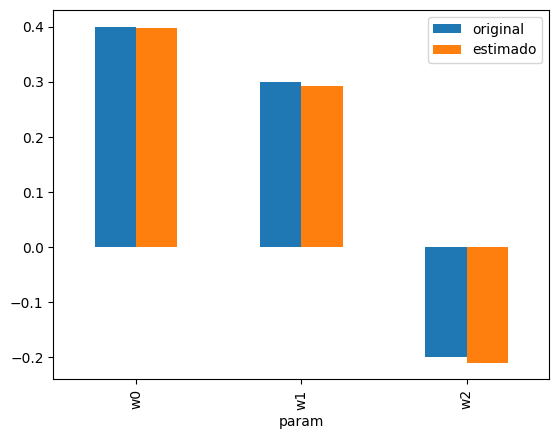

In [45]:
pd_results = pd.DataFrame([("w0", weights[0], w_0_estimated), ("w1", weights[1], w_1_estimated), ("w2", weights[2], w_2_estimated)],
                         columns=["param", "original", "estimado"])
pd_results.set_index("param").plot.bar();

Comprobamos que el algoritmo ha conseguido encontrar aproximaciones adecuadas para los parámetros del modelo.

In [26]:
y_predictions = model.predict({"x0": X[:, 0], "x1": X[:, 1]})

32/32 [==============================] - 0s 442us/step


32/32 [==============================] - 0s 491us/step - loss: 9.4905e-05


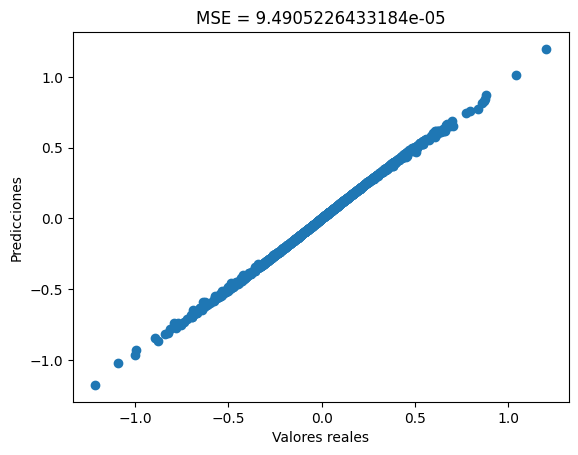

In [27]:
mse_error = model.evaluate({"x0": X[:, 0], "x1": X[:, 1]}, y)
plt.title(f"MSE = {mse_error}")
plt.scatter(y, y_predictions)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones");

Ejercicio: probar a repetir este apartado con otras ecuaciones. Por ejemplo:


$y = sigmoid(w_0 * x_0 + w_3) * (w_1 * x_1 + w_2)$



In [88]:
weights_s = np.asarray([0.4,0.3,-0.2,0.5])

In [89]:
 # * Definition of the sigmoid function: 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [90]:
X = np.random.randn(1_000, 2) # Dos entradas de x
y = sigmoid(weights_s[0]*X[:,0] + weights_s[3]) * (weights_s[1]* X[:,1] + weights_s[2])

Implementamos el modelo Keras para que siga la ecuación dada:

In [91]:
input_x0_s = keras.layers.Input(shape = (1,), name = 'x0')
input_x1_s = keras.layers.Input(shape = (1,), name = 'x1')

x_0_s = keras.layers.Dense(1, name="w0_w3")(input_x0_s)
x_0_s = tf.math.sigmoid(x_0_s)

x_1_s = keras.layers.Dense(1, name="w1_w2")(input_x1_s)

output_s = x_0_s * x_1_s

In [92]:
model_s = keras.models.Model([input_x0_s, input_x1_s], output_s) 

In [93]:
model_s.compile("adam", "mse")

In [94]:
model_s.fit({"x0": X[:,0], "x1":X[:,1]}, y, batch_size=1, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30


800/800 - 1s - loss: 0.5983 - val_loss: 0.3858 - 582ms/epoch - 727us/step
Epoch 2/30
800/800 - 0s - loss: 0.3039 - val_loss: 0.2061 - 354ms/epoch - 442us/step
Epoch 3/30
800/800 - 0s - loss: 0.1668 - val_loss: 0.1143 - 340ms/epoch - 425us/step
Epoch 4/30
800/800 - 0s - loss: 0.0968 - val_loss: 0.0679 - 347ms/epoch - 434us/step
Epoch 5/30
800/800 - 0s - loss: 0.0595 - val_loss: 0.0421 - 379ms/epoch - 474us/step
Epoch 6/30
800/800 - 0s - loss: 0.0380 - val_loss: 0.0281 - 367ms/epoch - 459us/step
Epoch 7/30
800/800 - 0s - loss: 0.0262 - val_loss: 0.0212 - 416ms/epoch - 521us/step
Epoch 8/30
800/800 - 0s - loss: 0.0190 - val_loss: 0.0154 - 385ms/epoch - 481us/step
Epoch 9/30
800/800 - 0s - loss: 0.0119 - val_loss: 0.0087 - 352ms/epoch - 440us/step
Epoch 10/30
800/800 - 0s - loss: 0.0056 - val_loss: 0.0036 - 339ms/epoch - 424us/step
Epoch 11/30
800/800 - 0s - loss: 0.0018 - val_loss: 9.2686e-04 - 364ms/epoch - 455us/step
Epoch 12/30
800/800 - 0s - loss: 4.1370e-04 - val_loss: 1.5927e-04 - 3

In [102]:
w_0_estimated  = model_s.get_layer("w0_w3").weights[0].numpy().flatten()[0]
w_1_estimated = model_s.get_layer("w1_w2").weights[0].numpy().flatten()[0]
w_2_estimated = model_s.get_layer("w1_w2").weights[1].numpy().flatten()[0]
w_3_estimated  = model_s.get_layer("w0_w3").weights[1].numpy().flatten()[0]

Plot the estimated results

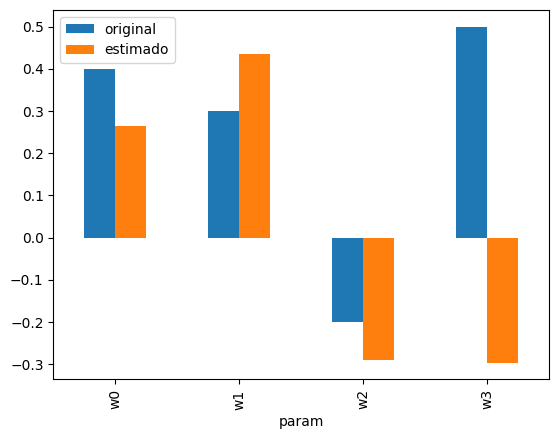

In [103]:
pd_results_s = pd.DataFrame([("w0", weights_s[0], w_0_estimated), ("w1", weights_s[1], w_1_estimated), ("w2", weights_s[2], w_2_estimated), ("w3", weights_s[3], w_3_estimated)],
                            columns = ['param', 'original', 'estimado'])
pd_results_s.set_index("param").plot.bar(); 

# Perceptrón multicapa

Vamos a tratar de resolver el problema anterior usando un perceptrón multicapa.

In [104]:
inputs = keras.layers.Input(shape=(2, ))
x = keras.layers.Dense(200, activation="tanh")(inputs) # Capa oculta de 200 neuronas
x = keras.layers.Dense(1, activation=None)(x)
model = keras.models.Model(inputs, x, name="multilayer")

In [105]:
model.compile(keras.optimizers.Adam(), "mse")

In [106]:
model.fit(X, y, batch_size=1, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20


800/800 - 1s - loss: 0.0038 - val_loss: 0.0016 - 611ms/epoch - 764us/step
Epoch 2/20
800/800 - 0s - loss: 0.0023 - val_loss: 0.0015 - 419ms/epoch - 524us/step
Epoch 3/20
800/800 - 0s - loss: 0.0022 - val_loss: 0.0022 - 421ms/epoch - 527us/step
Epoch 4/20
800/800 - 0s - loss: 0.0014 - val_loss: 0.0010 - 363ms/epoch - 454us/step
Epoch 5/20
800/800 - 0s - loss: 0.0014 - val_loss: 0.0016 - 354ms/epoch - 443us/step
Epoch 6/20
800/800 - 0s - loss: 0.0011 - val_loss: 4.9213e-04 - 413ms/epoch - 517us/step
Epoch 7/20
800/800 - 0s - loss: 9.3538e-04 - val_loss: 7.9786e-04 - 359ms/epoch - 449us/step
Epoch 8/20
800/800 - 0s - loss: 8.1145e-04 - val_loss: 3.3948e-04 - 361ms/epoch - 451us/step
Epoch 9/20
800/800 - 0s - loss: 6.7692e-04 - val_loss: 3.2019e-04 - 396ms/epoch - 495us/step
Epoch 10/20
800/800 - 0s - loss: 5.5957e-04 - val_loss: 1.6830e-04 - 356ms/epoch - 445us/step
Epoch 11/20
800/800 - 0s - loss: 5.4188e-04 - val_loss: 2.3092e-04 - 357ms/epoch - 447us/step
Epoch 12/20
800/800 - 0s - los

In [100]:
y_predictions = model.predict(X)

32/32 [==============================] - 0s 417us/step


32/32 [==============================] - 0s 445us/step - loss: 1.0614e-04


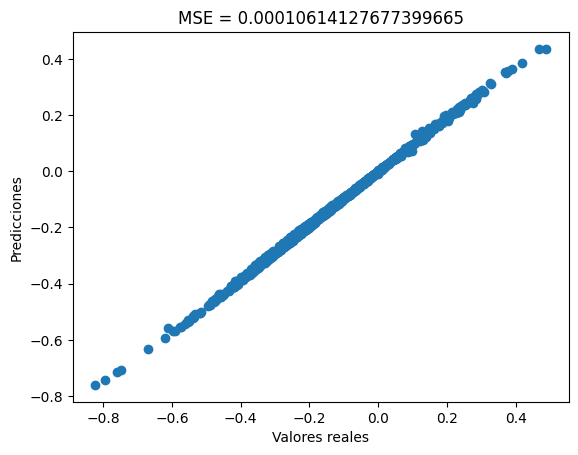

In [101]:
mse_error = model.evaluate(X, y)
plt.title(f"MSE = {mse_error}")
plt.scatter(y, y_predictions)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones");

En este caso no hemos supuesto conocida la ecuación que relaciona las salidas con la entrada (modelo no paramétrico). Aún así, ha sido capaz de encontrar un buen modelo para los datos dados. ¿Por qué?


**Teorema de aproximación universal:** Cualquier función continua es aproximable por un perceptrón de una sola capa suficientemente grande.

[Explicación Wikipedia](https://en.wikipedia.org/wiki/Universal_approximation_theorem)

[Explicación divulgativa](https://towardsdatascience.com/neural-networks-and-the-universal-approximation-theorem-8a389a33d30a)